# Esercitazione 3 - Plain vanilla option pricing

## 1 Obiettivo

Lo scopo di questa esercitazione è implementare un metodo numerico per il prezzamento di una opzione finanziaria.

## 2 Cenni teorici e metodo utilizzato

Nel mercato finanziario una plain-vanilla option o european option è un contratto tra due parti in cui colui che vende l'opzione (writer) riserva al compratore (holder) il diritto, ma non l'obbligo, di vendere (put option) o comprare (call option) in un tempo futuro stabilito una data azione. 
Il prezzo con cui potrà avvenire la compravendita dell'azione è stabilito dal writer nel momento di vendita dell'opzione.

L'holder dell'opzione, non avendo l'obbligo di comprare o vendere l'azione lo farà soltanto se ne può trarre profitto. Se $S(t)$ è il costo dell'azione in un certo tempo $t$ e $K$ il prezzo fissato dalla opzione (strike price),  allora l'holder eserciterà il suo diritto se:
- nel caso di una put option, $K > S(t)$ con un profitto pari a K-S(t)
- nel caso di una call option, $K < S(t)$ con un profitto pari S(t)-K

È quindi importante per il writer cercare di predire $S(t)$ in modo da prezzare sapientemente l'opzione.

La teoria di Black-Scholes fornisce delle formule analitiche per prezzare una opzione. Si basa sull'assunzione che il mercato sia massimamente efficiente e che il costo dell'azione nel tempo $S(t)$ possa essere modellizzato da un moto browniano geometrico con, il tasso di interesse a rischio zero ($r$) e la volatilità
($\sigma$) costanti.

## 3 Implementazione

Il programma che ho realizzato implementa il prezzamento delle opzioni europee con metodi Monte Carlo, ovvero stimando il prezzo $S(t)$ dell'azione al tempo t attraverso diverse simulazioni di moto browniano geometrico.

Il moto browniano geometrico dipende dai due parametri $\sigma$ e $\mu$ e può essere campionato utilizzando la seguente relazione

$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$

con $W(t)\sim\mathcal{N}(0,t)$ che permette di ottenere direttamente il valore di $S$ al tempo $t$. Essendo gli incrementi dati da $W(t)$ indipendenti e normalmente distribuiti è possibile anche  riscrivere la formula precedente discretizzando il moto browniano in più passi corrispondenti ai tempi $t_0 < t_1 < ... < t_i < ... <t_n$. Si ottiene quindi la seguente relazione:

$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$

Una volta stimato il prezzo dell'azione al tempo fissato ($T$) di scadenza dell'opzione, i prezzi suggeriti per la loro vendita ($C, P$) sono:
- per una put option, $P = e^{-r\cdot T} \cdot \text{max}[0, K-S(T)]$
- per una call option, $C = e^{-r\cdot T} \cdot \text{max}[0, S(T)-K]$

corrispondenti al profitto previsto per l'holder scontato del tasso di interesse a richio zero.

Il codice che ho realizzato implementa il calcolo per entrambe le tipologie di opzione utilizzando due modi diversi per campionare $S(t)$:
- attraverso campionamento diretto di $S(T)$
- attraverso discretizzazione del moto browniano dividendo $[0,T]$ in 100 sottointervalli e campionando $S(t_0), S(t_1), S(t_2),... S(T) $

In entrambi i casi è stato implementato l'algoritmo della media a blocchi. Un singolo step Monte Carlo corrisponde ad una singola valutazione di $P$ o $C$.

## 4  Utilizzo

Il codice che ho realizzato è costituito dal file principale `main.cpp` e da un file header `para.h` contenente le definizioni di alcune costanti utili per impostare diversi parametri della simulazione. È possibile modificare il loro valore e ricompilare il programma per realizzare simulazioni differenti.

Per l'esecuzione sono richiesti tre argomenti. Il primo permette di scegliere il nome del file in cui verranno salvati i risultati, gli altri due permettono invece di scegliere la tipologia di azione da prezzare e quale debba essere usato tra i due metodi sopra esposti.

In ciascuna riga del file di output vengono salvati 3 valori numerici, in ordine:
- il numero `i` del blocco a cui si riferiscono i valori della riga
- la miglior stima al blocco `i` della grandezza che si sta stimando, ottenuta mediando le medie di blocco dei blocchi da `0` a `i`
- incertezza statistica relativa al valore precedente

## 5 Risultati

per ottenere tutti i risultati che verranno presentati sono stati utilizzati i seguenti parametri:
- prezzo dell'azione a t=0, S(0) = 100
- tempo di scadenza dell'opzione, T=1
- strike price, K=100
- tasso di interesse a rischio zero, r=0.1
- volatilità, $\sigma$ = 0.25

inoltre, per quanto riguarda il campionamento Monte Carlo, ho utilizzato in tutti i casi $10^5$ steps divisi in $100$ blocchi.

Con gli stessi parametri, le soluzioni analitiche di Black-Scholes forniscono i seguenti valori:
- prezzo della call option C = 14.975791
- prezzo della put option P = 5.459532

Questi sono quindi i valori aspettati con cui saranno confrontati i risultati ottenuti con il metodo numerico.

### 5.1 Campionamento diretto, call option

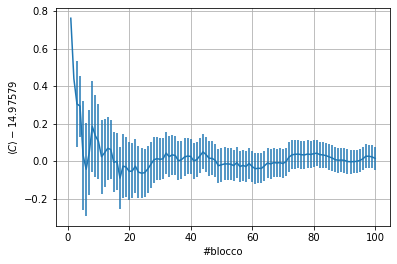

stima finale di C: 14.99
incertezza: 0.06

distante 0.3σ dal valore aspettato


In [1]:
from IPython.display import display, Latex
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
c_exp = 14.975790778311286
x, c, err = np.loadtxt('../03/03.1/call_dir', usecols=(0,1,2), delimiter=" ", unpack=True)
plt.errorbar(x, c-c_exp, err)
plt.xlabel("#blocco")
plt.ylabel('$\\langle C \\rangle  - 14.97579 $')
plt.grid()
plt.show()

print("stima finale di C: {:.4}".format(c[-1]))
print("incertezza: {:.1}".format(err[-1]))
print('\ndistante {:.1}σ dal valore aspettato'.format(abs(c[-1]-c_exp)/err[-1]))

### 5.2 Campionamento discreto, call option

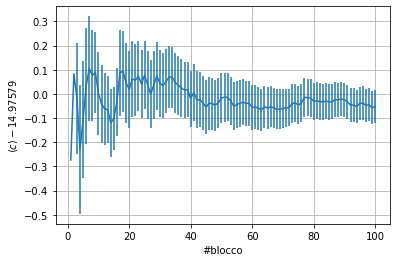

stima finale di C: 14.92
incertezza: 0.07

distante 0.8σ dal valore aspettato


In [2]:
x, c, err = np.loadtxt('../03/03.1/call_discr', usecols=(0,1,2), delimiter=" ", unpack=True)
plt.errorbar(x, c-14.975790778311286, err)
plt.grid()
plt.ylabel('$\\langle c \\rangle - 14.97579$')
plt.xlabel('#blocco')
plt.show()

print("stima finale di C: {:.4}".format(c[-1]))
print("incertezza: {:.1}".format(err[-1]))
print('\ndistante {:.1}σ dal valore aspettato'.format(abs(c[-1]-c_exp)/err[-1]))

### 5.3 Campionamento diretto, put option

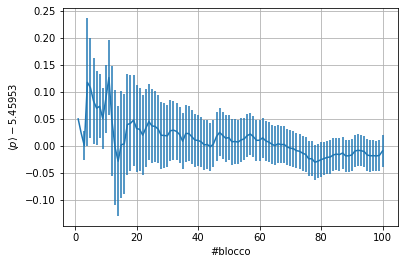

stima finale di C: 5.45
incertezza: 0.03

distante 0.3σ dal valore aspettato


In [3]:
p_exp = 5.4595325819072364
x, p, err = np.loadtxt('../03/03.1/put_dir', usecols=(0,1,2), delimiter=" ", unpack=True)
plt.errorbar(x, p-p_exp, err)
plt.grid()
plt.ylabel('$\\langle p \\rangle - 5.45953$')
plt.xlabel('#blocco')
plt.show()

print("stima finale di C: {:.3}".format(p[-1]))
print("incertezza: {:.1}".format(err[-1]))
print('\ndistante {:.1}σ dal valore aspettato'.format(abs(p[-1]-p_exp)/err[-1]))

### 5.4 Campionamento discreto, put option

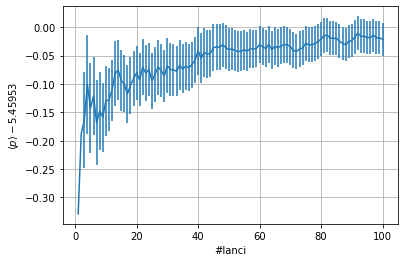

stima finale di C: 5.44
incertezza: 0.03

distante 0.7σ dal valore aspettato


In [5]:
x, p, err = np.loadtxt('../03/03.1/put_discr', usecols=(0,1,2), delimiter=" ", unpack=True)
plt.errorbar(x, p-5.4595325819072364, err)
plt.grid()
plt.ylabel('$\\langle p \\rangle - 5.45953$')
plt.xlabel('#lanci')
plt.show()

print("stima finale di C: {:.3}".format(p[-1]))
print("incertezza: {:.1}".format(err[-1]))
print('\ndistante {:.1}σ dal valore aspettato'.format(abs(p[-1]-p_exp)/err[-1]))

I grafici presentano le stime ottenute per i prezzi ($C$ e $P$) mostrando la progressiva diminuzione dell'incertezza statistica e l'aumento dell'accuratezza al crescere del numero di blocchi considerati.

I valori ottenuti sono tutti compatibili, entro la loro incertezza statistica, con i risultati analitici di Black-Scholes. Non sembrano esserci sostanziali differenze tra i due metodi utilizzati per il campionamento del moto browniano geometrico.